In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf

from sklearn.metrics import classification_report

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df.head()

profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740       533     0  
2         159        98     0  
3         414       651     0  
4         151       126     0

In [6]:
test_df.head()

profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.33               1                  0.33   
1            1                  0.00               5                  0.00   
2            1                  0.00               2                  0.00   
3            1                  0.00               1                  0.00   
4            1                  0.50               1                  0.00   

   name==username  description length  external URL  private  #posts  \
0               1                  30             0        1      35   
1               0                  64             0        1       3   
2               0                  82             0        1     319   
3               0                 143             0        1     273   
4               0                  76             0        1       6   

   #followers  #follows  fake  
0         488       604     0  
1          35         6     0  
2         328       668     0  
3       14890      7369     0  
4         225       356     0

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [9]:
train_df['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [10]:
train_df['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [11]:
test_df['profile pic'].value_counts()

profile pic
1    91
0    29
Name: count, dtype: int64

In [12]:
test_df['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

<Axes: >

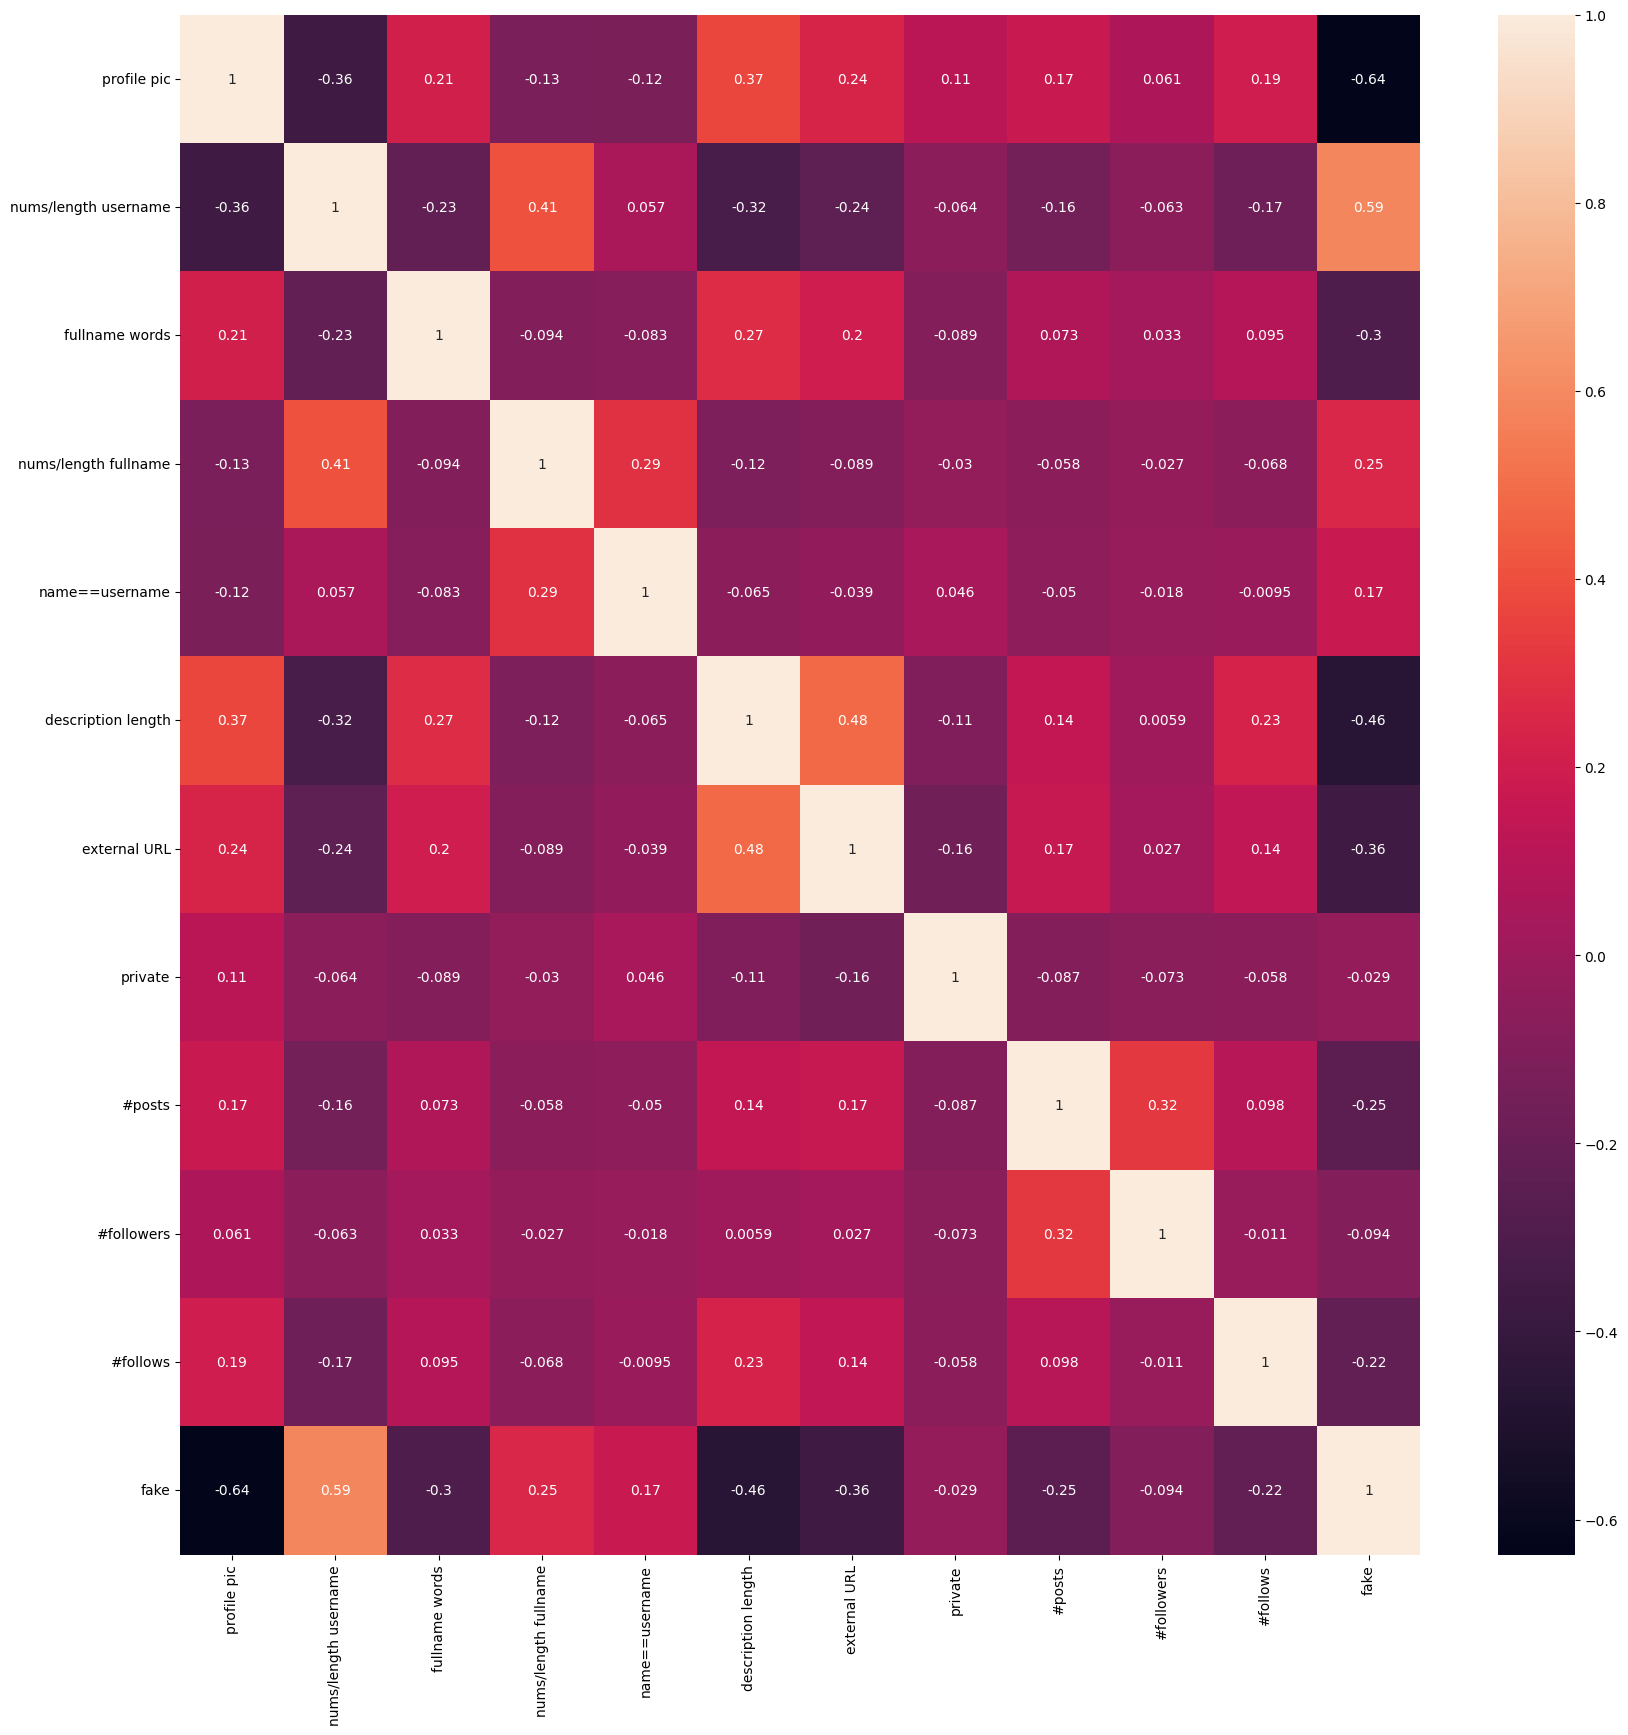

In [13]:
plt.figure(figsize=(20, 20))
cm = train_df.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

In [14]:
x_train = train_df.drop(columns=['fake'])
y_train = train_df['fake']


x_test = test_df.drop(columns=['fake'])
y_test = test_df['fake']

In [15]:
x_train

profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length  external URL  private  #posts  \
0                 0                  53             0        0      32   
1                 0                  44             0        0     286   
2                 0                   0             0        1      13   
3                 0                  82             0        0     679   
4                 0                   0             0        1       6   
..              ...                 ...           ...      ...     ...   
571               0                   0             0        0      33   
572               0                  21             0        0      44   
573               0                   0             0        0       4   
574               0                  11             0        0       0   
575               0                   0             0        0       2   

     #followers  #follows  
0          1000       955  
1          2740       533  
2           159        98  
3           414       651  
4           151       126  
..          ...       ...  
571         166       596  
572          66        75  
573          96       339  
574          57        73  
575         150       487  

[576 rows x 11 columns]

In [16]:
x_test

profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     name==username  description length  external URL  private  #posts  \
0                 1                  30             0        1      35   
1                 0                  64             0        1       3   
2                 0                  82             0        1     319   
3                 0                 143             0        1     273   
4                 0                  76             0        1       6   
..              ...                 ...           ...      ...     ...   
115               0                   0             0        0      13   
116               0                   0             0        0       4   
117               0                   0             0        0       3   
118               0                   0             0        0       1   
119               0                   0             0        0       3   

     #followers  #follows  
0           488       604  
1            35         6  
2           328       668  
3         14890      7369  
4           225       356  
..          ...       ...  
115         114       811  
116         150       164  
117         833      3572  
118         219      1695  
119          39        68  

[120 rows x 11 columns]

In [17]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [18]:
standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)
x_test = standardScaler.fit_transform(x_test)

In [19]:
x_train[0]

array([ 0.65248952,  0.49629929, -1.38831247, -0.28872256, -0.18966081,
        0.80638543, -0.36280938, -0.78611547, -0.18793216, -0.09271072,
        0.48694486])

In [20]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=2)

In [21]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [22]:
train_data_percentage = len(x_train)/(len(x_train) + len(x_test))
test_data_percentage = len(x_test)/(len(x_train) + len(x_test))

In [23]:
print(train_data_percentage)
print(test_data_percentage)

0.8275862068965517
0.1724137931034483


In [24]:
x_train.shape

(576, 11)

In [25]:
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [26]:
model = Sequential()
model.add(Dense(50,input_dim=11,activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

c:\Users\Kesavan Ramalingam\Documents\Instagram Fake Profile Detector\fake_profile\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,077 (47.18 KB)

 Trainable params: 12,077 (47.18 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
epochs_hist = model.fit(x_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6734 - loss: 0.6025 - val_accuracy: 0.8621 - val_loss: 0.3830
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8824 - loss: 0.3883 - val_accuracy: 0.9138 - val_loss: 0.2428
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8862 - loss: 0.3056 - val_accuracy: 0.9138 - val_loss: 0.1829
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9094 - loss: 0.2647 - val_accuracy: 0.9138 - val_loss: 0.1551
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9353 - loss: 0.2035 - val_accuracy: 0.8966 - val_loss: 0.1918
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9122 - loss: 0.2668 - val_accuracy: 0.8966 - val_loss: 0.1520
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9369 - loss: 0.1966 - val_accuracy: 0.8966 - val_loss: 0.1749
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8972 - loss: 0.2266 - val_accuracy: 0.8966 - val_loss

In [30]:
print(epochs_hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


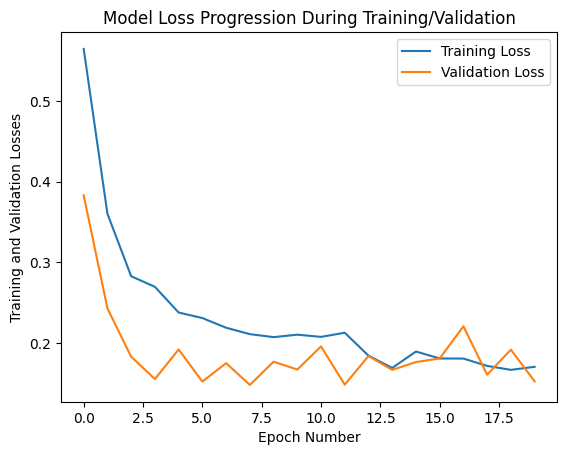

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [32]:
predictions = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [33]:
predicted_value = []
ground_truth = []
for i in predictions:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    ground_truth.append(np.argmax(i))

In [36]:
print(classification_report(ground_truth, predicted_value))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        60
           1       0.85      0.88      0.87        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



Text(0.5, 80.7222222222222, 'predicted class')

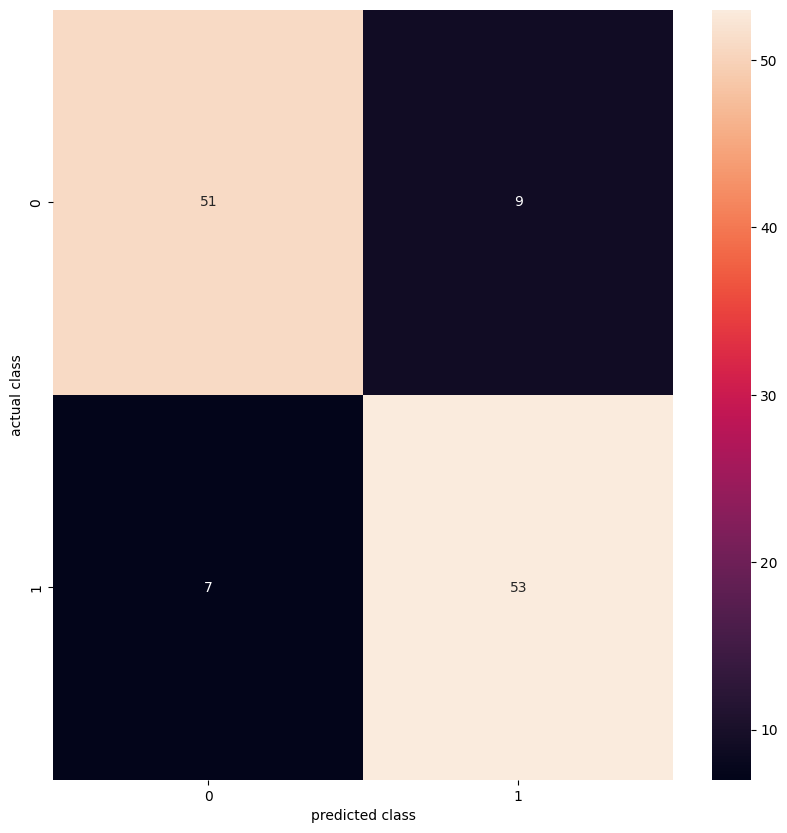

In [39]:
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 10))
cm = confusion_matrix(ground_truth, predicted_value) 
sns.heatmap(cm, annot = True)
plt.ylabel('actual class')
plt.xlabel('predicted class')